Импорт библиотек для работы

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, shapiro, ttest_ind, pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)

Чтение таблицы

In [248]:
df = pd.read_excel('SOI2.xlsx', header=0)
df = df.rename(columns={df.columns[0]: 'Тип отходов'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Тип отходов                  21 non-null     object
 1   Общий национальный           21 non-null     int64 
 2   Андалусия                    21 non-null     int64 
 3   Арагон                       21 non-null     int64 
 4   Астурия (Княжество)          21 non-null     int64 
 5   Балеарские острова           21 non-null     int64 
 6   Канарские острова            21 non-null     int64 
 7   Кантабрия                    21 non-null     int64 
 8   Кастилия и Леон              21 non-null     int64 
 9   Кастилия — Ла-Манча          21 non-null     int64 
 10  Каталония                    21 non-null     int64 
 11  Валенсийское сообщество      21 non-null     int64 
 12  Эстремадура                  21 non-null     int64 
 13  Галисия                      21 non-n

Вывод начала таблицы

In [249]:
df.head(3)

,Тип отходов,Общий национальный,Андалусия,Арагон,Астурия (Княжество),Балеарские острова,Канарские острова,Кантабрия,Кастилия и Леон,Кастилия — Ла-Манча,Каталония,Валенсийское сообщество,Эстремадура,Галисия,Мадрид (сообщество),Мурсия (регион),Наварра (особое сообщество),Страна Басков,Ла-Риоха
0,Бытовые отходы и аналогичные (домашние и общес...,19860620,3726448,579974,461249,520800,968176,297147,1120370,940788,2809616,1862736,435069,1084189,2871439,675707,310747,991421,132908
1,Смешанные крупногабаритные бытовые отходы (быт...,481080,154033,21715,9001,3650,26322,7411,22590,38981,82860,38598,4132,22204,18138,4262,10767,14769,1647
2,Невостребованные лекарства,186,6,0,108,0,0,0,0,7,31,0,0,0,30,4,0,0,0


Вывод конца таблицы

In [250]:
df.tail(3)

,Тип отходов,Общий национальный,Андалусия,Арагон,Астурия (Княжество),Балеарские острова,Канарские острова,Кантабрия,Кастилия и Леон,Кастилия — Ла-Манча,Каталония,Валенсийское сообщество,Эстремадура,Галисия,Мадрид (сообщество),Мурсия (регион),Наварра (особое сообщество),Страна Басков,Ла-Риоха
18,ОБЩИЕ СМЕШАННЫЕ ОТХОДЫ,20341700,3880481,601689,470250,524450,994498,304558,1142960,979769,2892476,1901334,439201,1106393,2889577,679969,321514,1006190,134555
19,Общее количество раздельно собранных отходов,4416413,584689,127698,91832,89377,156851,41395,437778,170904,933323,440476,45999,179212,690874,69315,96504,232576,24943
20,Общие отходы,24758113,4465170,729387,562082,613827,1151349,345953,1580738,1150673,3825799,2341810,485200,1285605,3580451,749284,418018,1238766,159498


### График 1: Общее количество отходов по регионам
На столбчатой диаграмме показано суммарное количество всех типов отходов по автономным сообществам Испании. Лидируют Андалусия, Каталония и Мадрид.


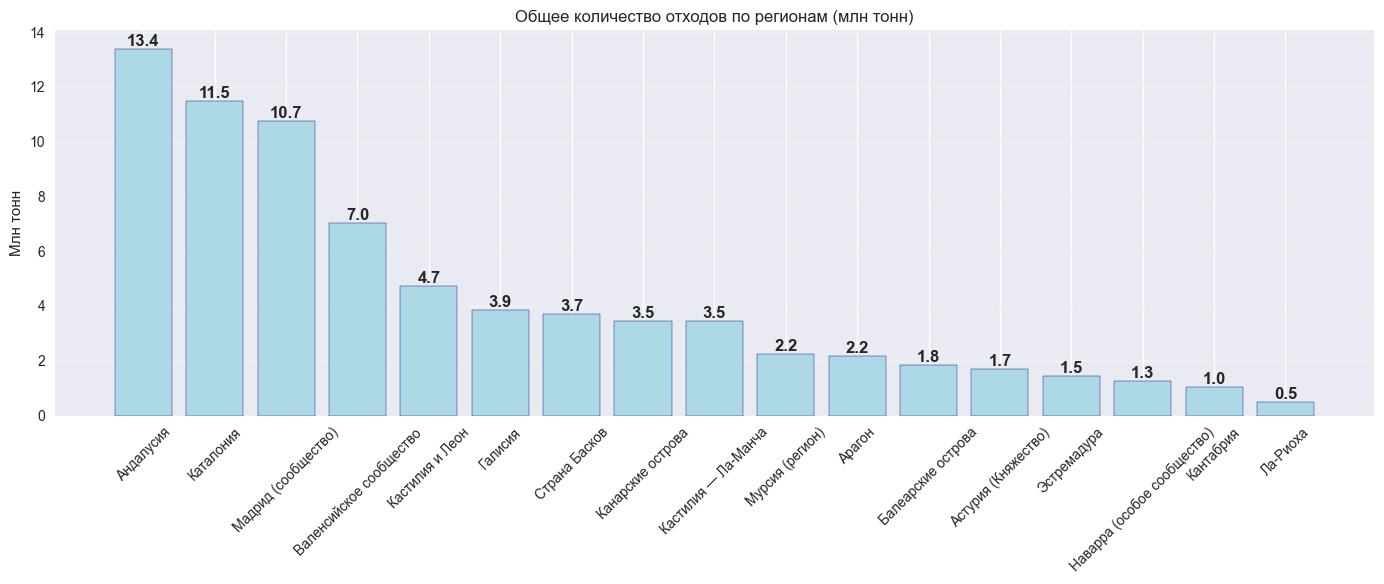

In [251]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

regions_data = df.drop(columns=[df.columns[0], 'Общий национальный'])
total_by_region = regions_data.sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
bars = plt.bar(total_by_region.index, total_by_region.values / 1000000, color='lightblue', edgecolor='navy')
plt.title('Общее количество отходов по регионам (млн тонн)')
plt.ylabel('Млн тонн')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}',
             ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()


### График 2: Доля основных типов отходов
Круговая диаграмма демонстрирует распределение основных категорий отходов. Преобладают бытовые отходы, бумага/картон и стекло.

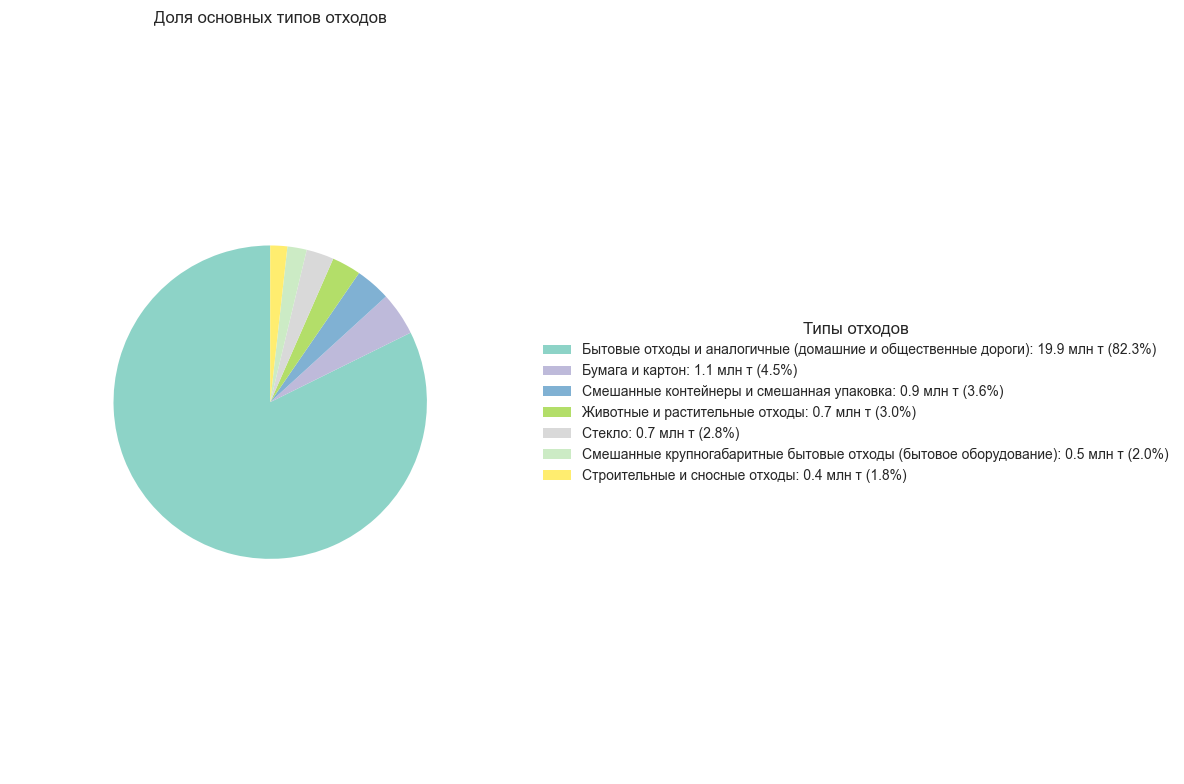

In [252]:
waste_totals = df.iloc[:-3].copy()  # Исключаем итоговые строки
waste_totals['Total'] = waste_totals['Общий национальный']
top_7_waste = waste_totals.nlargest(7, 'Total')

plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(np.linspace(0, 1, 7))
wedges, texts = plt.pie(top_7_waste['Total'], colors=colors, startangle=90)

# Создаем легенду с процентами
legend_labels = [f'{label}: {value/1000000:.1f} млн т ({pct:.1f}%)'
                for label, value, pct in zip(top_7_waste.iloc[:, 0],
                                           top_7_waste['Total'],
                                           top_7_waste['Total']/top_7_waste['Total'].sum()*100)]

plt.legend(wedges, legend_labels, title="Типы отходов",
           loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Доля основных типов отходов')
plt.axis('equal')
plt.tight_layout()
plt.show()

### График 3: Сравнение смешанных и селективно собранных отходов
Гистограмма показывает значительное преобладание смешанных отходов над селективно собранными.

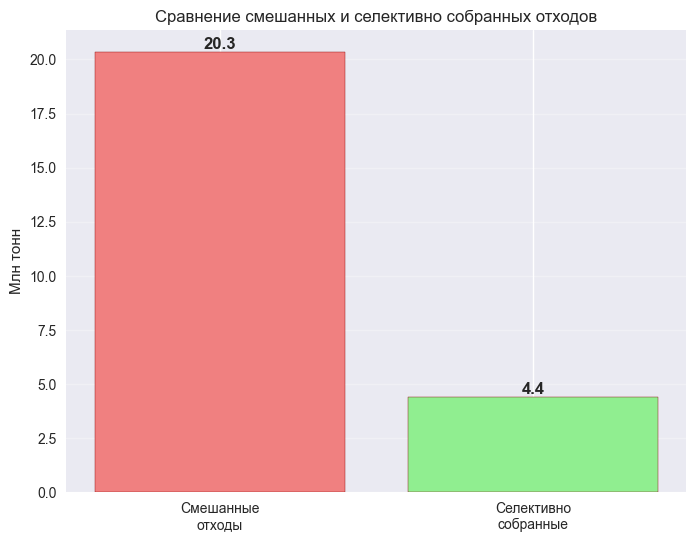

In [253]:
mixed_idx = df.iloc[:, 0].str.contains('ОБЩИЕ СМЕШАННЫЕ', na=False)
selective_idx = df.iloc[:, 0].str.contains('раздельно собранных', na=False)

mixed = df[mixed_idx]['Общий национальный'].values[0]
selective = df[selective_idx]['Общий национальный'].values[0]

categories = ['Смешанные\nотходы', 'Селективно\nсобранные']
values = [mixed/1000000, selective/1000000]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=['lightcoral', 'lightgreen'], edgecolor='darkred')
plt.title('Сравнение смешанных и селективно собранных отходов')
plt.ylabel('Млн тонн')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}',
             ha='center', va='bottom', fontweight='bold', fontsize=12)
plt.show()

### График 4: Топ-5 регионов по селективному сбору
Диаграмма выделяет регионы с наиболее развитой системой раздельного сбора отходов.

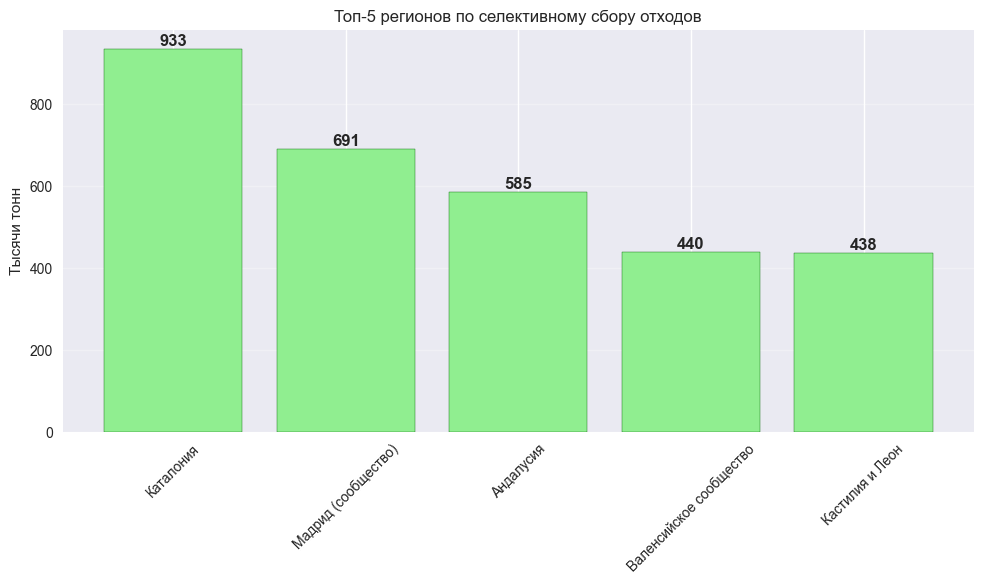

In [254]:
selective_by_region = df[selective_idx].drop(columns=[df.columns[0], 'Общий национальный']).iloc[0]
top_5_selective = selective_by_region.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_selective.index, top_5_selective.values / 1000,
               color='lightgreen', edgecolor='darkgreen')
plt.title('Топ-5 регионов по селективному сбору отходов')
plt.ylabel('Тысячи тонн')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.0f}',
             ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

In [255]:
waste_volumes = df.iloc[0, 1:19].values
stat, p_value = shapiro(waste_volumes)
print(f'Статистика Шапиро-Уилка = {stat}')
print(f'p-value = {p_value}')

Статистика Шапиро-Уилка = 0.4311517015580981
p-value = 2.1389114631187194e-07


In [256]:
contingency_data = []
waste_indices = [0, 5, 6, 8, 13]  # индексы выбранных типов отходов
region_columns = [1, 10, 14, 11, 13]  # индексы выбранных регионов

for i in waste_indices:
    row = []
    for j in region_columns:
        row.append(df.iloc[i, j])
    contingency_data.append(row)

chi2, p_value, dof, expected = chi2_contingency(contingency_data)
print(f'Хи-квадрат = {chi2}')
print(f'p-value = {p_value}')
print(f'Степени свободы = {dof}')

Хи-квадрат = 281320.525759709
p-value = 0.0
Степени свободы = 16


In [257]:
madrid_data = df.iloc[:-3, 14].values  # Мадрид, исключая итоговые строки
catalonia_data = df.iloc[:-3, 10].values  # Каталония, исключая итоговые строки

t_stat, p_value = ttest_ind(madrid_data, catalonia_data, nan_policy='omit')
print(f't-статистика = {t_stat}')
print(f'p-value = {p_value}')

t-статистика = -0.06180188383249272
p-value = 0.9510824854055104


In [258]:
glass_data = df.iloc[5, 1:19].astype(float).values  # данные по стеклу
paper_data = df.iloc[6, 1:19].astype(float).values  # данные по бумаге

corr, p_value = pearsonr(glass_data, paper_data)
print(f'Коэффициент корреляции Пирсона = {t_stat}')
print(f'p-value = {p_value}')

Коэффициент корреляции Пирсона = -0.06180188383249272
p-value = 1.9508982282845894e-20


In [259]:
plastic_data = df.iloc[8, 1:19].astype(float).values  # данные по пластику
mixed_containers_data = df.iloc[13, 1:19].astype(float).values  # данные по смешанным контейнерам

corr, p_value = spearmanr(plastic_data, mixed_containers_data)
print(f'Коэффициент корреляции Спирмена = {corr}')
print(f'p-value = {p_value}')

Коэффициент корреляции Спирмена = 0.6432628632143425
p-value = 0.003977125960601613
